# ***Heart Disease Prediction***

In [1]:
import sys
import os
sys.path.append(os.path.abspath(r'C:\Users\nirik\myfiles\myprojects\machine learning\heart disease prediction\src'))


import pandas as pd
import numpy as np


import preprocessing
import pca_analysis
import model_training
import model_evaluation
import visualization



In [2]:
#loading data 
df=preprocessing.load_data(r'C:\Users\nirik\myfiles\myprojects\machine learning\heart disease prediction\data\raw\Heart_Disease_Prediction.csv')

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


<Figure size 800x600 with 0 Axes>

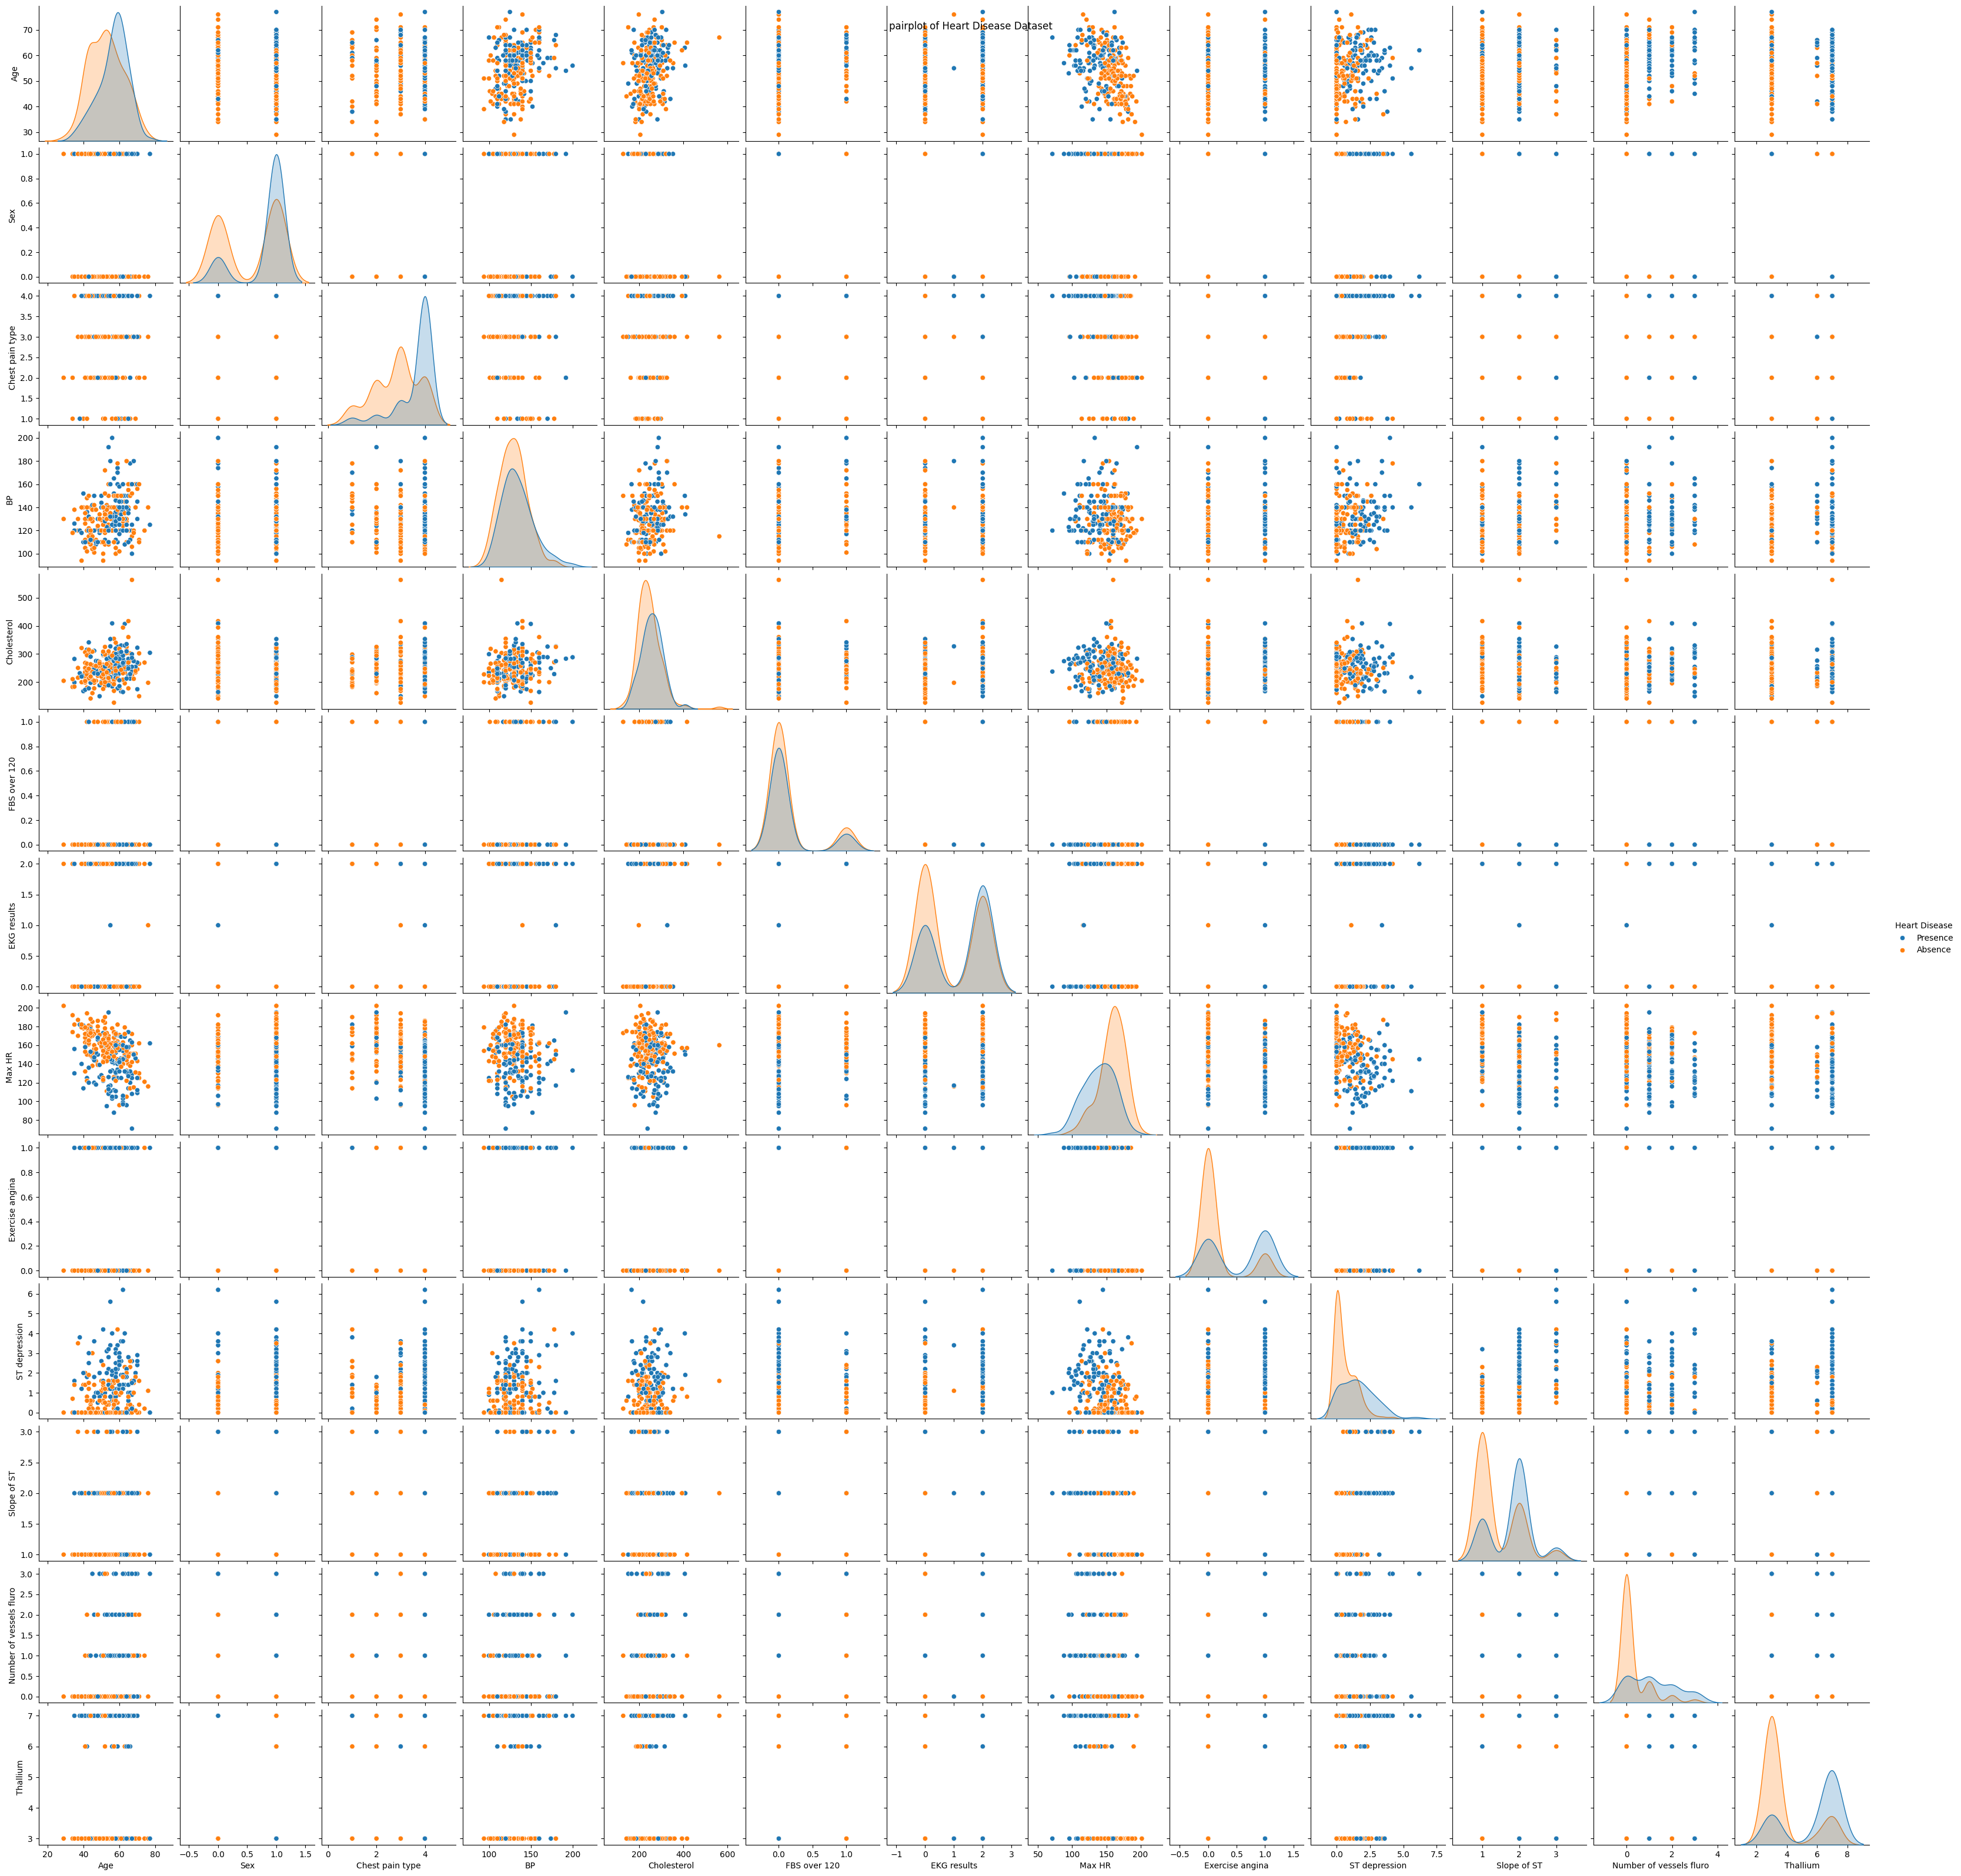

In [4]:
visualization.plot_data(df,'Heart Disease')


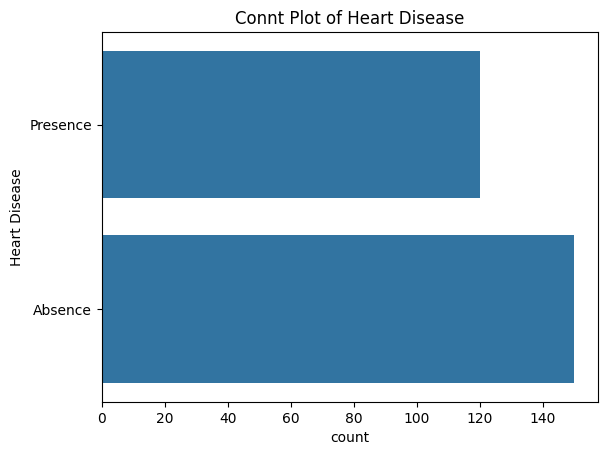

In [5]:
#count plot of target column
visualization.countplt(df,'Heart Disease')

In [6]:
#preprocessing
df=preprocessing.preprocess_data(df)

In [7]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [8]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [9]:
X=df.drop(columns='Heart Disease')
y=df['Heart Disease']

In [10]:
# applying PCA
principal_components,pca_model=pca_analysis.apply_pca(X)

In [11]:
pca_model

PCA(n_components=4)

In [12]:
principal_components

array([[ 2.67128364, -1.57352749, -1.03152212, -0.48748759],
       [ 0.95544376, -3.46830557, -1.83020969,  0.06818274],
       [-0.89505263,  0.6123152 ,  0.42865557, -0.67093054],
       ...,
       [-0.6500992 , -1.86056778,  0.0085675 ,  1.78532766],
       [ 0.03581268,  1.14275491,  0.28955379,  0.18244824],
       [ 3.22233838, -1.37257958, -0.75562839, -0.69021952]])

<Figure size 800x600 with 0 Axes>

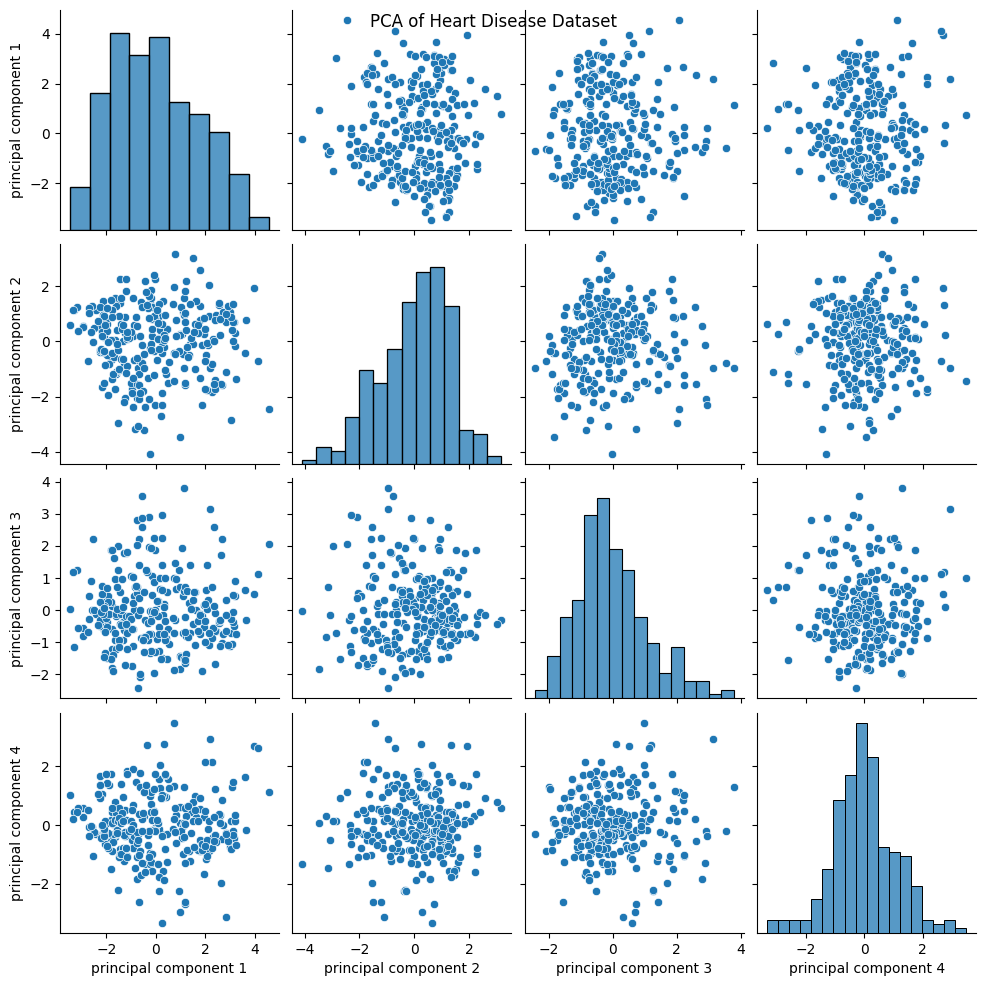

In [13]:
visualization.plot_pca_data(principal_components,y)

In [14]:
x_train,x_test,y_train,y_test=preprocessing.split_data(principal_components,y)

# *modeling*

In [15]:
svm=model_training.model(x_train,y_train)

# *Prediction*

In [16]:
y_pred=svm.predict(x_test)

# *Evaluation*

In [17]:
#accuracy score
model_evaluation.accuracy(y_test,y_pred)

0.9259259259259259

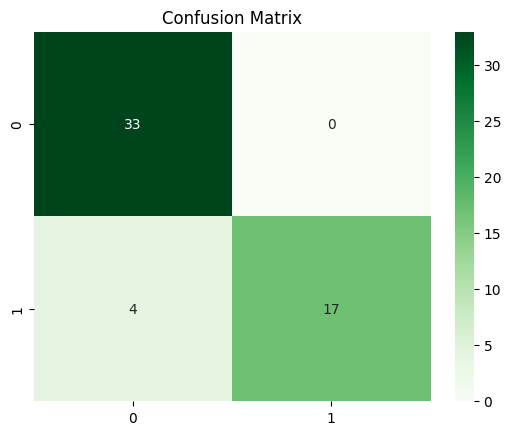

In [18]:
#confusion matrix
hp=model_evaluation.matrix(y_test,y_pred)
visualization.heat_map(hp)

In [19]:
#precision
model_evaluation.precision(y_test,y_pred)

1.0

In [20]:
#recall
model_evaluation.recall(y_test,y_pred)

0.8095238095238095

In [21]:
#f1 score
model_evaluation.f1(y_test,y_pred)

0.8947368421052632